## MLP on MNIST with Batch Normalization on 2, 3 and 5 hidden layer architecture with Dropout

In [0]:

from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [34]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [36]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [37]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [39]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [40]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

<h2> MLP + AdamOptimizer </h2>

In [76]:

model_batch = Sequential()

model_batch.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model_batch.add(Dense(96, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )

model_batch.add(Dense(output_dim, activation='softmax'))

model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_58 (Dense)             (None, 96)                35040     
_________________________________________________________________
dense_59 (Dense)             (None, 10)                970       
Total params: 321,750
Trainable params: 321,750
Non-trainable params: 0
_________________________________________________________________


In [77]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.2500 - acc: 0.9259 - val_loss: 0.1233 - val_acc: 0.9632
Epoch 2/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0996 - acc: 0.9693 - val_loss: 0.0974 - val_acc: 0.9710
Epoch 3/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0637 - acc: 0.9803 - val_loss: 0.0922 - val_acc: 0.9737
Epoch 4/20
12672/60000 [=====>........................] - ETA: 4s - loss: 0.0381 - acc: 0.989660000/60000 [==============================] - 6s 102us/step - loss: 0.0471 - acc: 0.9850 - val_loss: 0.0952 - val_acc: 0.9706
Epoch 5/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0369 - acc: 0.9881 - val_loss: 0.0807 - val_acc: 0.9759
Epoch 6/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0296 - acc: 0.9902 - val_loss: 0.0848 - val_acc: 0.9772
Epoch 7/20
37632/60000 [===============

Test score: 0.11716977973502794
Test accuracy: 0.9791


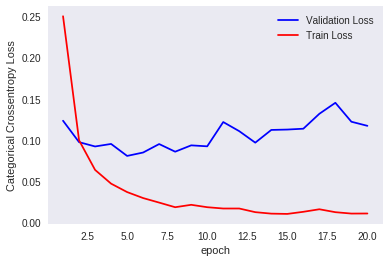

In [78]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [79]:

model_batch = Sequential()

model_batch.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model_batch.add(Dense(96, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )

model_batch.add(Dense(36, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_61 (Dense)             (None, 96)                35040     
_________________________________________________________________
dense_62 (Dense)             (None, 36)                3492      
_________________________________________________________________
dense_63 (Dense)             (None, 10)                370       
Total params: 324,642
Trainable params: 324,642
Non-trainable params: 0
_________________________________________________________________


In [80]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.4463 - acc: 0.8964 - val_loss: 0.2298 - val_acc: 0.9323
Epoch 2/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.1410 - acc: 0.9591 - val_loss: 0.1435 - val_acc: 0.9578
Epoch 3/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0976 - acc: 0.9706 - val_loss: 0.1238 - val_acc: 0.9644
Epoch 4/20
 6400/60000 [==>...........................] - ETA: 5s - loss: 0.0608 - acc: 0.979560000/60000 [==============================] - 6s 104us/step - loss: 0.0681 - acc: 0.9791 - val_loss: 0.1182 - val_acc: 0.9684
Epoch 5/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0574 - acc: 0.9819 - val_loss: 0.1194 - val_acc: 0.9699
Epoch 6/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0541 - acc: 0.9828 - val_loss: 0.1108 - val_acc: 0.9711
Epoch 7/20
28288/60000 [=============>.

Test score: 0.14107527235259587
Test accuracy: 0.9767


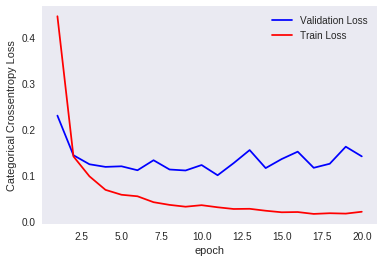

In [81]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [103]:

model_batch1 = Sequential()

model_batch1.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model_batch1.add(Dense(326, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )

model_batch1.add(Dense(196, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )

model_batch1.add(Dense(96, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )

model_batch1.add(Dense(36, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )

model_batch1.add(Dense(output_dim, activation='softmax'))

model_batch1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_71 (Dense)             (None, 326)               167238    
_________________________________________________________________
dense_72 (Dense)             (None, 196)               64092     
_________________________________________________________________
dense_73 (Dense)             (None, 96)                18912     
_________________________________________________________________
dense_74 (Dense)             (None, 36)                3492      
_________________________________________________________________
dense_75 (Dense)             (None, 10)                370       
Total params: 656,024
Trainable params: 656,024
Non-trainable params: 0
_________________________________________________________________


In [104]:
model_batch1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 212us/step - loss: 13.4104 - acc: 0.1678 - val_loss: 13.2926 - val_acc: 0.1753
Epoch 2/20
60000/60000 [==============================] - 10s 174us/step - loss: 13.9311 - acc: 0.1357 - val_loss: 13.2878 - val_acc: 0.1756
Epoch 3/20
27392/60000 [============>.................] - ETA: 5s - loss: 13.1801 - acc: 0.182360000/60000 [==============================] - 10s 174us/step - loss: 13.3852 - acc: 0.1695 - val_loss: 13.5070 - val_acc: 0.1620
Epoch 4/20
60000/60000 [==============================] - 10s 174us/step - loss: 13.8658 - acc: 0.1397 - val_loss: 13.5553 - val_acc: 0.1590
Epoch 5/20
58880/60000 [============================>.] - ETA: 0s - loss: 13.5304 - acc: 0.160560000/60000 [==============================] - 10s 174us/step - loss: 13.5306 - acc: 0.1605 - val_loss: 13.5537 - val_acc: 0.1591
Epoch 6/20
60000/60000 [==============================] - 11s 176us/step - lo

Test score: 13.285699151611329
Test accuracy: 0.1757


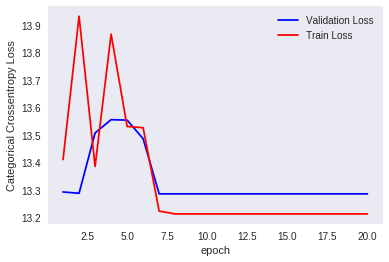

In [105]:
score = model_batch1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> MLP + Adam + ReLU  + Batch Normalization</h2>

In [73]:
from keras.layers.normalization import BatchNormalization

model_drop = Sequential()

model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())


model_drop.add(Dense(96, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())


model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_28 (Batc (None, 364)               1456      
_________________________________________________________________
dense_55 (Dense)             (None, 96)                35040     
_________________________________________________________________
batch_normalization_29 (Batc (None, 96)                384       
_________________________________________________________________
dense_56 (Dense)             (None, 10)                970       
Total params: 323,590
Trainable params: 322,670
Non-trainable params: 920
_________________________________________________________________


In [74]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.2110 - acc: 0.9388 - val_loss: 0.1052 - val_acc: 0.9674
Epoch 2/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.0831 - acc: 0.9755 - val_loss: 0.0845 - val_acc: 0.9725
Epoch 3/20
54272/60000 [==========================>...] - ETA: 0s - loss: 0.0517 - acc: 0.984960000/60000 [==============================] - 8s 130us/step - loss: 0.0524 - acc: 0.9847 - val_loss: 0.0950 - val_acc: 0.9698
Epoch 4/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.0384 - acc: 0.9884 - val_loss: 0.0882 - val_acc: 0.9716
Epoch 5/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.0299 - acc: 0.9909 - val_loss: 0.0802 - val_acc: 0.9760
Epoch 6/20
25472/60000 [===========>..................] - ETA: 4s - loss: 0.0190 - acc: 0.994860000/60000 [==============================] - 8s 130us/step - loss: 0.0224 - acc:

Test score: 0.08950398277270179
Test accuracy: 0.9785


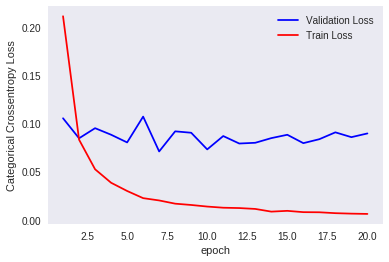

In [75]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [58]:

from keras.layers.normalization import BatchNormalization

model_drop = Sequential()

model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())


model_drop.add(Dense(96, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())


model_drop.add(Dense(36, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_16 (Batc (None, 364)               1456      
_________________________________________________________________
dense_36 (Dense)             (None, 96)                35040     
_________________________________________________________________
batch_normalization_17 (Batc (None, 96)                384       
_________________________________________________________________
dense_37 (Dense)             (None, 36)                3492      
_________________________________________________________________
batch_normalization_18 (Batc (None, 36)                144       
_________________________________________________________________
dense_38 (Dense)             (None, 10)                370       
Total para

In [59]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.2628 - acc: 0.9297 - val_loss: 0.1260 - val_acc: 0.9618
Epoch 2/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.0918 - acc: 0.9735 - val_loss: 0.0982 - val_acc: 0.9696
Epoch 3/20
52608/60000 [=========================>....] - ETA: 0s - loss: 0.0616 - acc: 0.981260000/60000 [==============================] - 8s 132us/step - loss: 0.0614 - acc: 0.9812 - val_loss: 0.0923 - val_acc: 0.9728
Epoch 4/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.0468 - acc: 0.9858 - val_loss: 0.0899 - val_acc: 0.9736
Epoch 5/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.0338 - acc: 0.9893 - val_loss: 0.0806 - val_acc: 0.9768
Epoch 6/20
25216/60000 [===========>..................] - ETA: 4s - loss: 0.0249 - acc: 0.992460000/60000 [==============================] - 8s 131us/step - loss: 0.0279 - acc:

Test score: 0.09016670634818438
Test accuracy: 0.9795


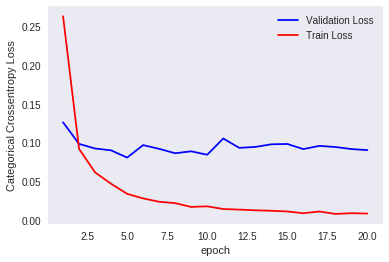

In [60]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [67]:

from keras.layers.normalization import BatchNormalization

model_drop1 = Sequential()

model_drop1.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop1.add(BatchNormalization())


model_drop1.add(Dense(326, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop1.add(BatchNormalization())


model_drop1.add(Dense(196, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop1.add(BatchNormalization())


model_drop1.add(Dense(96, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop1.add(BatchNormalization())


model_drop1.add(Dense(36, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop1.add(BatchNormalization())

model_drop1.add(Dense(output_dim, activation='softmax'))


model_drop1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_23 (Batc (None, 512)               2048      
_________________________________________________________________
dense_46 (Dense)             (None, 326)               167238    
_________________________________________________________________
batch_normalization_24 (Batc (None, 326)               1304      
_________________________________________________________________
dense_47 (Dense)             (None, 196)               64092     
_________________________________________________________________
batch_normalization_25 (Batc (None, 196)               784       
_________________________________________________________________
dense_48 (Dense)             (None, 96)                18912     
__________

In [68]:
model_drop1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 290us/step - loss: 0.2795 - acc: 0.9236 - val_loss: 0.1291 - val_acc: 0.9604
Epoch 2/20
59264/60000 [============================>.] - ETA: 0s - loss: 0.0941 - acc: 0.973160000/60000 [==============================] - 15s 243us/step - loss: 0.0940 - acc: 0.9730 - val_loss: 0.1049 - val_acc: 0.9675
Epoch 3/20
60000/60000 [==============================] - 15s 242us/step - loss: 0.0620 - acc: 0.9804 - val_loss: 0.0976 - val_acc: 0.9718
Epoch 4/20
33152/60000 [===============>..............] - ETA: 6s - loss: 0.0456 - acc: 0.985360000/60000 [==============================] - 15s 243us/step - loss: 0.0458 - acc: 0.9849 - val_loss: 0.0942 - val_acc: 0.9703
Epoch 5/20
60000/60000 [==============================] - 15s 244us/step - loss: 0.0360 - acc: 0.9888 - val_loss: 0.0825 - val_acc: 0.9738
Epoch 6/20
27264/60000 [============>.................] - ETA: 7s - loss: 0.0258 - acc: 0

Test score: 0.06883215385827571
Test accuracy: 0.9834


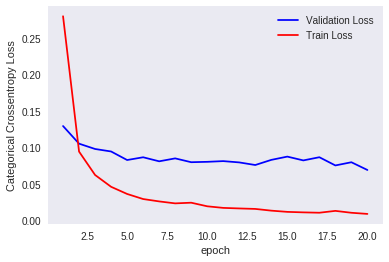

In [69]:
score = model_drop1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

  <h3>MLP + ReLU + Adam + With Dropout and Batch Normalization</h3>

In [61]:

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model_drop = Sequential()

model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(96, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))


model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_19 (Batc (None, 364)               1456      
_________________________________________________________________
dropout_16 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 96)                35040     
_________________________________________________________________
batch_normalization_20 (Batc (None, 96)                384       
_________________________________________________________________
dropout_17 (Dropout)         (None, 96)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 10)                970       
Total para

In [62]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.5561 - acc: 0.8331 - val_loss: 0.1834 - val_acc: 0.9424
Epoch 2/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.2832 - acc: 0.9158 - val_loss: 0.1333 - val_acc: 0.9587
Epoch 3/20
48384/60000 [=======================>......] - ETA: 1s - loss: 0.2334 - acc: 0.929560000/60000 [==============================] - 8s 131us/step - loss: 0.2291 - acc: 0.9312 - val_loss: 0.1158 - val_acc: 0.9629
Epoch 4/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.1973 - acc: 0.9414 - val_loss: 0.0979 - val_acc: 0.9693
Epoch 5/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.1710 - acc: 0.9492 - val_loss: 0.0965 - val_acc: 0.9673
Epoch 6/20
21504/60000 [=========>....................] - ETA: 4s - loss: 0.1656 - acc: 0.949860000/60000 [==============================] - 8s 133us/step - loss: 0.1590 - acc:

Test score: 0.06931823280235985
Test accuracy: 0.9801


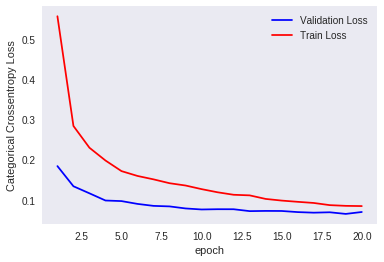

In [63]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [51]:

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model_drop = Sequential()

model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(96, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(36, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_3 (Batch (None, 364)               1456      
_________________________________________________________________
dropout_3 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 96)                35040     
_________________________________________________________________
batch_normalization_4 (Batch (None, 96)                384       
_________________________________________________________________
dropout_4 (Dropout)          (None, 96)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 36)                3492      
__________

In [52]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 169us/step - loss: 1.0813 - acc: 0.6553 - val_loss: 0.2706 - val_acc: 0.9254
Epoch 2/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.5282 - acc: 0.8445 - val_loss: 0.1970 - val_acc: 0.9434
Epoch 3/20
35584/60000 [================>.............] - ETA: 3s - loss: 0.4240 - acc: 0.879160000/60000 [==============================] - 8s 140us/step - loss: 0.4093 - acc: 0.8844 - val_loss: 0.1543 - val_acc: 0.9527
Epoch 4/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.3363 - acc: 0.9064 - val_loss: 0.1394 - val_acc: 0.9581
Epoch 5/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.2970 - acc: 0.9188 - val_loss: 0.1301 - val_acc: 0.9614
Epoch 6/20
 8448/60000 [===>..........................] - ETA: 6s - loss: 0.2733 - acc: 0.922860000/60000 [==============================] - 8s 140us/step - loss: 0.2673 - acc:

Test score: 0.08116542890121928
Test accuracy: 0.9795


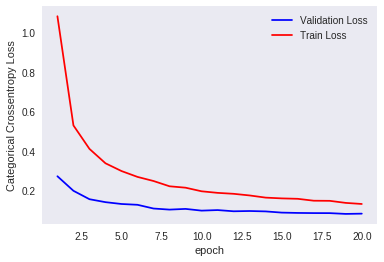

In [53]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [55]:

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model_drop1 = Sequential()

model_drop1.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop1.add(BatchNormalization())
model_drop1.add(Dropout(0.5))

model_drop1.add(Dense(326, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop1.add(BatchNormalization())
model_drop1.add(Dropout(0.5))

model_drop1.add(Dense(196, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop1.add(BatchNormalization())
model_drop1.add(Dropout(0.5))

model_drop1.add(Dense(96, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop1.add(BatchNormalization())
model_drop1.add(Dropout(0.5))

model_drop1.add(Dense(36, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop1.add(BatchNormalization())
model_drop1.add(Dropout(0.5))

model_drop1.add(Dense(output_dim, activation='softmax'))


model_drop1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 326)               167238    
_________________________________________________________________
batch_normalization_12 (Batc (None, 326)               1304      
_________________________________________________________________
dropout_12 (Dropout)         (None, 326)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 196)               64092     
__________

In [56]:
model_drop1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 299us/step - loss: 1.8565 - acc: 0.3800 - val_loss: 0.6879 - val_acc: 0.7896
Epoch 2/20
58752/60000 [============================>.] - ETA: 0s - loss: 0.9271 - acc: 0.693460000/60000 [==============================] - 15s 256us/step - loss: 0.9225 - acc: 0.6948 - val_loss: 0.3604 - val_acc: 0.9047
Epoch 3/20
60000/60000 [==============================] - 15s 257us/step - loss: 0.6260 - acc: 0.8078 - val_loss: 0.2393 - val_acc: 0.9329
Epoch 4/20
32896/60000 [===============>..............] - ETA: 6s - loss: 0.5032 - acc: 0.852860000/60000 [==============================] - 15s 258us/step - loss: 0.4841 - acc: 0.8602 - val_loss: 0.1947 - val_acc: 0.9448
Epoch 5/20
60000/60000 [==============================] - 15s 254us/step - loss: 0.4011 - acc: 0.8898 - val_loss: 0.1668 - val_acc: 0.9530
Epoch 6/20
27264/60000 [============>.................] - ETA: 8s - loss: 0.3524 - acc: 0

Test score: 0.08810921824942343
Test accuracy: 0.9788


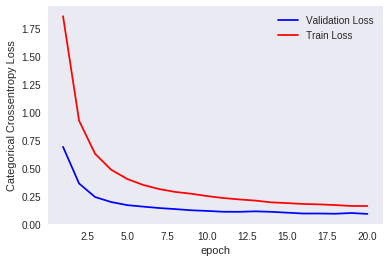

In [57]:
score = model_drop1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Summary:
                     **We applied ReLU as activation function and Adam optimizer with Batch Normlization, Drop-out and without Dropout and Batch Normalization on 2, 3 and 5 hidden layer architecture on MNIST dataset and plotted theTrain and Test Loss and found out accuracy for each Model.**

In [106]:
from tabulate import tabulate
import operator
import collections
import itertools

table = []

bold = "\033[1m"
reset = "\033[0;0m"

print()
print(bold+"Accuracy on 2, 3, 5 MLP hidden layer architecture "+reset)
table.append([bold+"2-Layer"+reset, 0.979, 0.117, [784,364,96,10]])
table.append(["3-Layer", 0.976, 0.141, [784,364,96,36,10]])
table.append([bold+"5-Layer"+reset, 0.1757, 13.28, [784,512,326,196,96,36,10]])
table.append(["2-Layer(BatchNormalz)", 0.978, 0.089, [784,364,96,10]])
table.append([bold+"3-Layer(BatchNormalz)"+reset, 0.979, 0.090, [784,364,96,36,10]])
table.append(["5-Layer(BatchNormalz)", 0.9834, 0.0688, [784,512,326,196,96,36,10]])
table.append([bold+"2-Layer(BatchNormalz+Dropout)"+reset, 0.9801, 0.069, [784,364,96,10]])
table.append(["3-Layer(BatchNormalz+Dropout)", 0.979, 0.0811, [784,364,96,36,10]])
table.append([bold+"5-Layer(BatchNormalz+Dropout)"+reset, 0.9788, 0.088, [784,512,326,196,96,36,10]])
print(tabulate(table, headers=[bold+'Accuracy','Test Loss','layer-architecture'+reset], tablefmt='grid'))
print("-----------------------------------------------")
table.clear()


Accuracy on 2, 3, 5 MLP hidden layer architecture 
+-------------------------------+------------+-------------+----------------------------------+
|                               |   Accuracy |   Test Loss | layer-architecture               |
+===============================+============+=============+==================================+
| 2-Layer                       |     0.979  |      0.117  | [784, 364, 96, 10]               |
+-------------------------------+------------+-------------+----------------------------------+
| 3-Layer                       |     0.976  |      0.141  | [784, 364, 96, 36, 10]           |
+-------------------------------+------------+-------------+----------------------------------+
| 5-Layer                       |     0.1757 |     13.28   | [784, 512, 326, 196, 96, 36, 10] |
+-------------------------------+------------+-------------+----------------------------------+
| 2-Layer(BatchNormalz)         |     0.978  |      0.089  | [784, 364, 96, 10]     